In [1]:
# the imports:

# pandas for handling the data
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a Python data visualization library that offers a user-friendly interface 
#    for generating visually appealing and informative statistical graphics.
import seaborn as sns

# From sklearn we import some classes and functions for data handling, the tree classifier, 
#    the accuracy and the plot function to depict the tree  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 

# This class we use it to search exhaustive over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV 

# exercise 1 - load:
df_iris = pd.read_csv("iris_teach_2.csv")
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  iris_name  
0    setosa  
1    setosa  
2    setosa  
3    setosa  
4    setosa  


In [2]:
#exercise 2 - check for empty cells:
empty_cells = df_iris.isnull().sum()
print("number of empty cells>")
print(empty_cells)

number of empty cells>
sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     1
iris_name            1
dtype: int64


In [4]:
#exercise 3 - remove rows with missing values
df_iris.dropna(inplace=True)
#inplace arg. makes changes directly on the file

In [5]:
#exercise 4 - dividing the dataset
X = df_iris.drop('iris_name', axis=1)  
y = df_iris['iris_name'] 
print("features>")
print(X.head())
print("target>")
print(y.head())

features>
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
target>
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: iris_name, dtype: object


In [6]:
# exercise 5 - encode classes from target
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [7]:
# exercise 6 - training&testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, random_state=42)

In [11]:
# exercise 7
X_modified = X.drop('petal width (cm)', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, random_state=42)
X_train_modif = X_train.drop('petal width (cm)', axis=1)
X_test_modif = X_test.drop('petal width (cm)', axis=1)


clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train_modif, y_train)
pred = clf.predict(X_test_modif)
accuracy = accuracy_score(y_test, pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.93


Best hyperparameters: {'max_depth': 4}


[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]')]

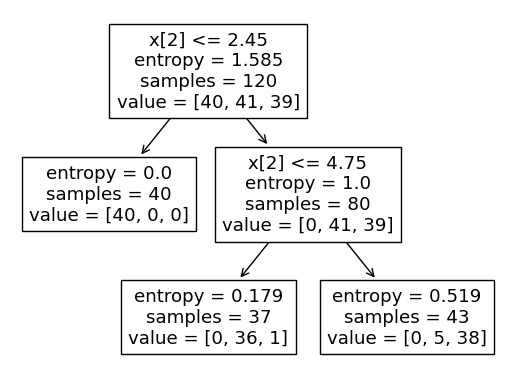

In [12]:
# exercise 8
param_grid = {"max_depth": [1, 2, 3, 4,5,6,7]} 
#Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5) 
#Fit the grid search object to the training data
grid_search.fit(X_train_modif, y_train) 
#Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42) 
tree_clf_tuned.fit(X_train, y_train)
plot_tree(tree_clf_tuned)